<a href="https://colab.research.google.com/github/CaptaiN785/ML-Notebooks/blob/main/car_price_prediction/second_hand_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get <a href = "https://www.kaggle.com/datasets/kukuroo3/used-car-price-dataset-competition-format" >Dataset</a> from here.

In [2]:
## Extracting the zip file
import zipfile
file = zipfile.ZipFile("car_data.zip")
file.extractall()
file.close()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X_train = pd.read_csv("X_train.csv")
X_train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0


In [5]:
y_train = pd.read_csv("y_train.csv")
y_train.head()

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990


In [6]:
train = X_train.merge(y_train, on='carID')
train.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990


In [7]:
X_test = pd.read_csv("X_test.csv")
X_test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0


In [8]:
y_test = pd.read_csv("test_label/y_test.csv")
y_test.head()

,carID,price
0,12000,38000
1,12001,23495
2,12004,59999
3,12013,16713
4,12017,46000


In [9]:
test = X_test.merge(y_test, on = 'carID')
test.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0,38000
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0,23495
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0,59999
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0,16713
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0,46000


In [10]:
df = pd.concat([train, test], axis = 0)
df.head()

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990


In [11]:
df.shape

(7632, 11)

In [12]:
df.isna().any()

carID           False
brand           False
model           False
year            False
transmission    False
mileage         False
fuelType        False
tax             False
mpg             False
engineSize      False
price           False
dtype: bool

In [13]:
df.duplicated().any()

False

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 0 to 2671
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         7632 non-null   int64  
 1   brand         7632 non-null   object 
 2   model         7632 non-null   object 
 3   year          7632 non-null   int64  
 4   transmission  7632 non-null   object 
 5   mileage       7632 non-null   int64  
 6   fuelType      7632 non-null   object 
 7   tax           7632 non-null   float64
 8   mpg           7632 non-null   float64
 9   engineSize    7632 non-null   float64
 10  price         7632 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 715.5+ KB


In [15]:
## Droping the carID as it has no use
df.drop('carID', axis = 1, inplace = True)

In [16]:
df.columns

Index(['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price'],
      dtype='object')

### Exploring the data

In [17]:
# price
df['price'].min(), df['price'].max()

(450, 159999)

In [18]:
df.describe()

,year,mileage,tax,mpg,engineSize,price
count,7632.000000,7632.000000,7632.000000,7632.000000,7632.000000,7632.000000
mean,2016.731787,24837.685928,152.657888,50.166483,2.128132,23579.922825
std,2.889072,23994.794380,81.821950,35.579174,0.782125,16474.496951
min,1970.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,2016.000000,5800.000000,145.000000,38.200000,1.600000,12215.250000
50%,2017.000000,18891.000000,145.000000,47.100000,2.000000,19200.000000
75%,2019.000000,36500.250000,150.000000,54.300000,2.800000,30490.000000
max,2020.000000,259000.000000,580.000000,470.800000,6.600000,159999.000000


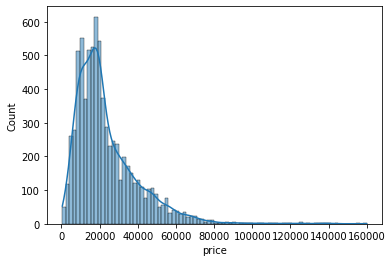

In [19]:
sns.histplot(df['price'], kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


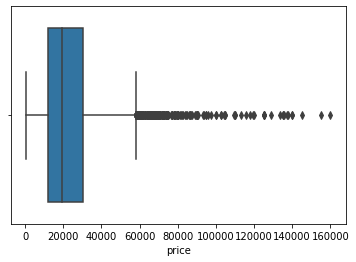

In [20]:
sns.boxplot(df['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


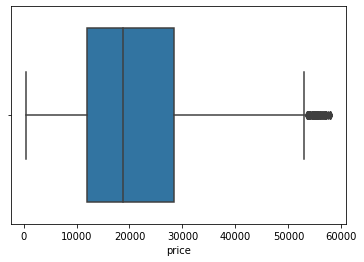

In [21]:
## Here it seems that there are some outliers in price
## Using iqr method to remove the outliers

def iqr(df, feature):
    q1 = np.percentile(df[feature], 25)
    q3 = np.percentile(df[feature], 75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr

    return df[(df[feature] > lb) & (df[feature] < ub)]

df = iqr(df, 'price')
sns.boxplot(df['price'])

In [22]:
df['brand'].unique()

array(['hyundi', 'vauxhall', 'vw', 'skoda', 'merc', 'toyota', 'bmw',
       'ford', 'audi'], dtype=object)

In [23]:
df.groupby('brand').mean()['price'].sort_values(ascending = True)

brand
vauxhall    11978.981818
skoda       13908.515674
hyundi      14763.489596
ford        15933.644649
toyota      18721.217877
vw          21596.989574
merc        27197.768293
bmw         32545.929697
audi        35985.259681
Name: price, dtype: float64

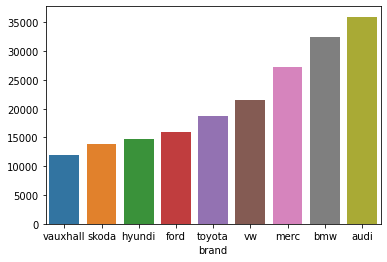

In [24]:
brand_wise_mean = df.groupby('brand').mean()['price'].sort_values(ascending = True)
sns.barplot(x = brand_wise_mean.index, y = brand_wise_mean.values)

In [25]:
## Car price depends on the brand too much so ordering the brand w.r.t. price

In [26]:
brand_label = {}

for i, brand in enumerate(brand_wise_mean.index):
    brand_label[brand] = i
brand_label

{'audi': 8,
 'bmw': 7,
 'ford': 3,
 'hyundi': 2,
 'merc': 6,
 'skoda': 1,
 'toyota': 4,
 'vauxhall': 0,
 'vw': 5}

In [27]:
df['brand'] = df['brand'].map(brand_label)
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,0,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
3,5,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,1,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
5,6,V Class,2019,Automatic,4170,Diesel,145.0,44.1,2.1,40890


In [28]:
## model
df['model'].unique().shape

(89,)

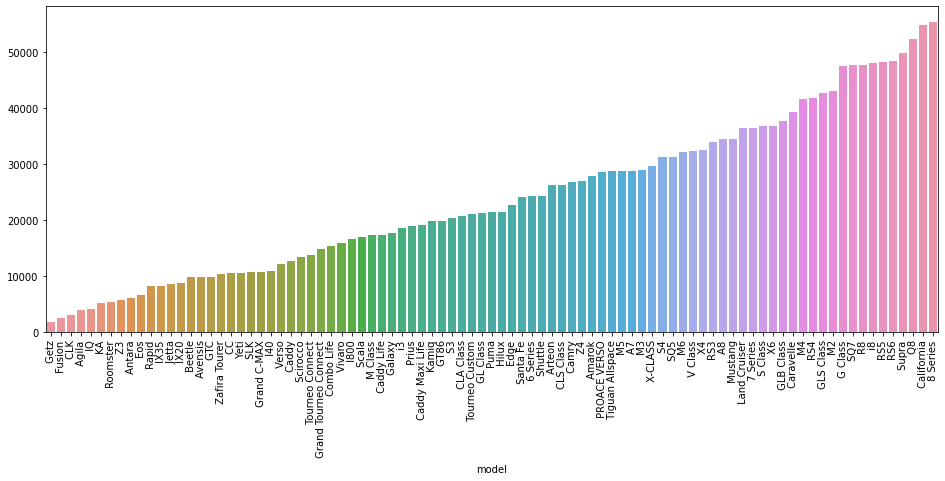

In [29]:
## There are total 90 model available in this dataset
plt.figure(figsize = (16, 6))
model_wise_mean = df.groupby('model').mean()['price'].sort_values(ascending = True)
plt.xticks(rotation = 90)
sns.barplot(x = model_wise_mean.index, y = model_wise_mean.values)

In [30]:
## Figure out the brand wise model
df[df['brand'] == 8]['model'].unique()
## These are the model under audi
## So I will order the brand on the basis of price and brand

array([' S3', ' A8', ' RS6', ' Q8', ' SQ7', ' A7', ' RS5', ' RS3', ' SQ5',
       ' RS4', ' S4', ' R8'], dtype=object)

In [31]:
brand_wise_model = {}
overall_model_order = {}
for brand, id in brand_label.items():
    new_df = df[df['brand'] == id]
    bwm = new_df.groupby('model').mean()['price'].sort_values()
    order = {}
    for i, model in enumerate(bwm.index):
        order[model] = i
        overall_model_order[model] = i
    brand_wise_model[brand] = order
print(brand_wise_model)

{'vauxhall': {' Agila': 0, ' Antara': 1, ' GTC': 2, ' Zafira Tourer': 3, ' Combo Life': 4, ' Vivaro': 5}, 'skoda': {' Roomster': 0, ' Rapid': 1, ' Yeti': 2, ' Scala': 3, ' Kamiq': 4}, 'hyundi': {' Getz': 0, ' IX35': 1, ' IX20': 2, ' I40': 3, ' I800': 4, ' Santa Fe': 5}, 'ford': {' Fusion': 0, ' KA': 1, ' Grand C-MAX': 2, ' Tourneo Connect': 3, ' Grand Tourneo Connect': 4, ' Galaxy': 5, ' Tourneo Custom': 6, ' Puma': 7, ' Edge': 8, ' Mustang': 9}, 'toyota': {' IQ': 0, ' Avensis': 1, ' Verso': 2, ' Prius': 3, ' GT86': 4, ' Hilux': 5, ' Camry': 6, ' PROACE VERSO': 7, ' Land Cruiser': 8, ' Supra': 9}, 'vw': {' Eos': 0, ' Jetta': 1, ' Beetle': 2, ' CC': 3, ' Caddy': 4, ' Scirocco': 5, ' Caddy Life': 6, ' Caddy Maxi Life': 7, ' Shuttle': 8, ' Arteon': 9, ' Amarok': 10, ' Tiguan Allspace': 11, ' Caravelle': 12, ' California': 13}, 'merc': {' CLK': 0, ' SLK': 1, ' M Class': 2, ' CLA Class': 3, ' GL Class': 4, ' CLS Class': 5, ' X-CLASS': 6, ' V Class': 7, ' S Class': 8, ' GLB Class': 9, ' GLS 

In [32]:
length = 0
for bnd, val in brand_wise_model.items():
    length += len(val)
print(length, len(overall_model_order))

89 89


In [33]:
## here no model is overlapped
# so now removing the model with their label
df['model'] = df['model'].map(overall_model_order)
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2,5,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,0,2,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
3,5,5,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,1,3,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
5,6,7,2019,Automatic,4170,Diesel,145.0,44.1,2.1,40890


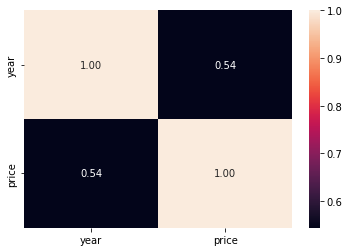

In [34]:
## year
## checking the price correlation with year
sns.heatmap(df[['year', 'price']].corr(), annot= True, fmt = '1.2f')

In [35]:
# I will change this year as age of car
# how old car is from current year
from datetime import datetime
curr_year = datetime.now().year
curr_year

2022

In [36]:
df['year'] = df['year'].apply(lambda x: curr_year - x)
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2,5,3,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,0,2,7,Manual,47870,Diesel,125.0,60.1,2.0,7700
3,5,5,6,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,1,3,2,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
5,6,7,3,Automatic,4170,Diesel,145.0,44.1,2.1,40890


In [37]:
## transmission
df['transmission'].unique()

array(['Semi-Auto', 'Manual', 'Automatic', 'Other'], dtype=object)

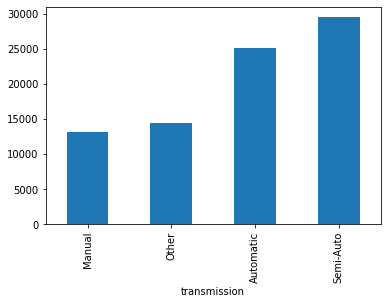

In [38]:
df.groupby('transmission').mean()['price'].sort_values().plot(kind = 'bar')

In [39]:
df['transmission'] = df['transmission'].map({'Manual':0, 'Other':1, 'Automatic':2, 'Semi-Auto':3})
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2,5,3,3,4223,Diesel,145.0,39.8,2.2,31995
1,0,2,7,0,47870,Diesel,125.0,60.1,2.0,7700
3,5,5,6,2,20423,Diesel,30.0,57.6,2.0,12999
4,1,3,2,3,3569,Petrol,145.0,47.1,1.0,16990
5,6,7,3,2,4170,Diesel,145.0,44.1,2.1,40890


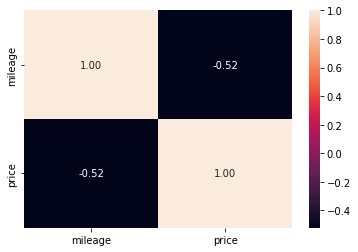

In [40]:
## mileage
sns.heatmap(df[['mileage', 'price']].corr(), annot = True, fmt = '1.2f')

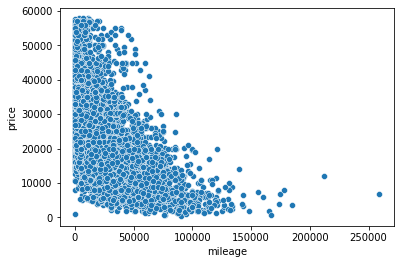

In [41]:
sns.scatterplot(x='mileage', y = 'price', data =df)

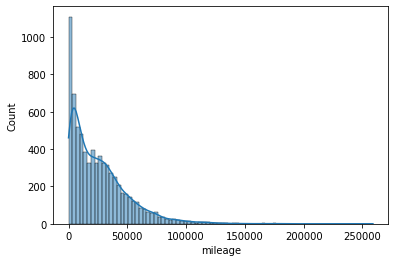

In [42]:
sns.histplot(df['mileage'], kde = True)

In [43]:
## Here data is right skewed
df.columns

Index(['brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'price'],
      dtype='object')

In [44]:
# fuelType
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype=object)

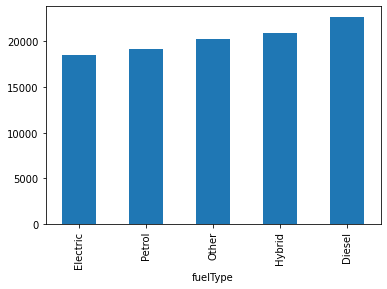

In [45]:
## Checking the price by fueltype
df.groupby('fuelType').mean()['price'].sort_values().plot(kind = 'bar')

In [46]:
# There is no as such difference between the mean price of vehicle
## but try keeping it 
fueltype = df.groupby('fuelType').mean()['price'].sort_values().index
fueltype_order = {}
for i, fuel in enumerate(fueltype):
    fueltype_order[fuel] = i
print(fueltype_order)

{'Electric': 0, 'Petrol': 1, 'Other': 2, 'Hybrid': 3, 'Diesel': 4}


In [47]:
df['fuelType'] = df['fuelType'].map(fueltype_order)

In [48]:
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2,5,3,3,4223,4,145.0,39.8,2.2,31995
1,0,2,7,0,47870,4,125.0,60.1,2.0,7700
3,5,5,6,2,20423,4,30.0,57.6,2.0,12999
4,1,3,2,3,3569,1,145.0,47.1,1.0,16990
5,6,7,3,2,4170,4,145.0,44.1,2.1,40890


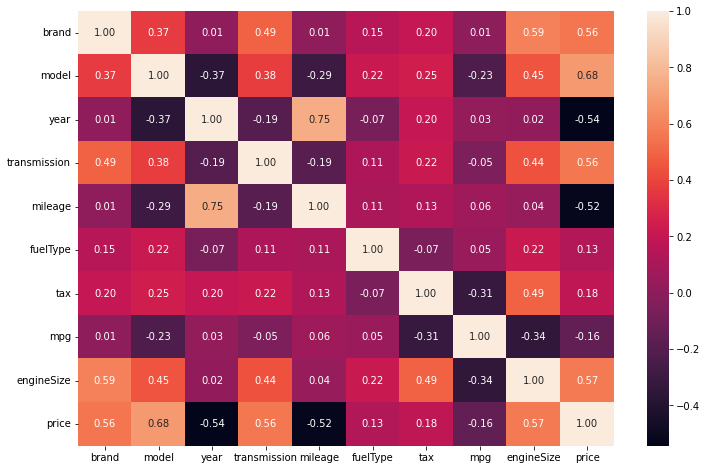

In [49]:
## Now data is completely refined
plt.figure(figsize = (12, 8))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f')

In [50]:
### Here data is highly correlated with target variable

In [51]:
## Checking the data duplicacy
df[df.duplicated()]

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
722,7,3,2,3,5,1,145.0,37.2,2.0,35850
1300,2,3,5,0,17393,4,145.0,65.7,1.7,11485
1465,2,3,3,0,30,4,145.0,54.3,1.6,16000
1908,2,3,3,0,30,4,145.0,54.3,1.6,16000
1977,6,6,3,2,500,4,260.0,35.8,2.3,26995
...,...,...,...,...,...,...,...,...,...,...
2393,3,8,3,2,10,4,145.0,37.2,2.0,33000
2505,5,12,3,2,10,4,145.0,33.6,2.0,54995
2526,5,9,4,3,4350,4,145.0,52.3,2.0,22785
2550,1,3,2,3,4112,1,145.0,45.6,1.5,17650


In [52]:
## Now removing the duplicate data from the set

df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().any()

False

In [53]:
cdf = df[['mileage', 'tax', 'mpg']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cdf_scaled = scaler.fit_transform(cdf)
df[['mileage', 'tax', 'mpg']] = cdf_scaled
df.head()

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,2,5,3,3,-0.894330,4,-0.087712,-0.307571,2.2,31995
1,0,2,7,0,0.914079,4,-0.329916,0.254412,2.0,7700
3,5,5,6,2,-0.223122,4,-1.480389,0.185202,2.0,12999
4,1,3,2,3,-0.921427,1,-0.087712,-0.105479,1.0,16990
5,6,7,3,2,-0.896526,4,-0.087712,-0.188530,2.1,40890


In [54]:
## Splitting the data into train and test split

from sklearn.model_selection import train_test_split

X = df.drop('price', axis = 1)
y = df['price']/1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5075, 9), (5075,), (2175, 9), (2175,))

In [55]:
## Now performing the model building
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Root mean squared error on test data is : ", mean_squared_error(pred, y_test)**0.5)
print("Root mean squared error on train data is : ", mean_squared_error(y_train, model.predict(X_train))**0.5)

Root mean squared error on test data is :  5.444969167402577
Root mean squared error on train data is :  5.684036434405384


In [56]:
# Now using the SVR here
from sklearn.svm import SVR

model = SVR()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Root mean squared error on test data is : ", mean_squared_error(pred, y_test)**0.5)
print("Root mean squared error on train data is : ", mean_squared_error(y_train, model.predict(X_train))**0.5)

Root mean squared error on test data is :  4.494755669491402
Root mean squared error on train data is :  4.687571622202022


In [57]:
# Now using the random forest regression

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(ccp_alpha=0.01)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Root mean squared error on test data is : ", mean_squared_error(pred, y_test)**0.5)
print("Root mean squared error on train data is : ", mean_squared_error(y_train, model.predict(X_train))**0.5)

Root mean squared error on test data is :  2.699878094004077
Root mean squared error on train data is :  1.7145839429236926


In [58]:
## It is a kind of good model having 2500 price up and down

In [59]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Root mean squared error on test data is : ", mean_squared_error(pred, y_test)**0.5)
print("Root mean squared error on train data is : ", mean_squared_error(y_train, model.predict(X_train))**0.5)

[16:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root mean squared error on test data is :  3.1916700978609684
Root mean squared error on train data is :  3.008469680443152


In [60]:
from sklearn.neighbors import KNeighborsRegressor as KNN

model = KNN()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Root mean squared error on test data is : ", mean_squared_error(pred, y_test)**0.5)
print("Root mean squared error on train data is : ", mean_squared_error(y_train, model.predict(X_train))**0.5)

Root mean squared error on test data is :  2.828974653190693
Root mean squared error on train data is :  2.371914433268367


In [61]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Root mean squared error on test data is : ", mean_squared_error(pred, y_test)**0.5)
print("Root mean squared error on train data is : ", mean_squared_error(y_train, model.predict(X_train))**0.5)

Root mean squared error on test data is :  3.44459721365641
Root mean squared error on train data is :  0.20960449369391648
